In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# import plotly libraries
import plotly.express as px
import plotly.graph_objects as go

In [2]:
train_pd = pd.read_csv('train.csv')
test_pd = pd.read_csv('test.csv')

#display(train_pd.head())
#display(test_pd.head())
train_pd.head()
test_pd.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train_pd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# removing the survived column from the training data and storing it in a separate variable
survived = train_pd['Survived']
train_pd = train_pd.drop('Survived', axis=1)


In [5]:
#checking the shape of the dataframes
print(train_pd.shape)
print(test_pd.shape)

(891, 11)
(418, 11)


In [6]:
# storing the passenger id in a separate variable for later use
train_idx = train_pd['PassengerId']
test_idx = test_pd['PassengerId']

combined_pd = pd.concat([train_pd, test_pd]).reset_index(drop=True)

In [7]:
#display(combined_pd)
#combined_pd = combined_pd.drop('PassengerId', axis=1)
#combined_pd.head(25)

In [8]:
print("Null Values in each column:")
print(combined_pd.isnull().sum())

Null Values in each column:
PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [9]:
# get values counts of each age.
y = combined_pd['Age'].value_counts()  
y

Age
24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
60.50     1
11.50     1
0.33      1
0.17      1
38.50     1
Name: count, Length: 98, dtype: int64

In [10]:
# get the index values (ages).
x = y.index.values
x

array([24.  , 22.  , 21.  , 30.  , 18.  , 25.  , 28.  , 36.  , 27.  ,
       26.  , 29.  , 19.  , 23.  , 32.  , 31.  , 35.  , 20.  , 45.  ,
       33.  , 39.  , 17.  , 16.  , 40.  , 42.  , 34.  , 50.  , 47.  ,
       48.  , 38.  ,  2.  , 41.  , 54.  ,  4.  ,  1.  ,  9.  , 44.  ,
       43.  , 37.  , 49.  , 51.  , 55.  , 14.  , 60.  ,  3.  , 58.  ,
       46.  , 52.  ,  6.  , 15.  ,  8.  , 57.  , 64.  , 13.  , 61.  ,
       62.  ,  5.  ,  7.  , 11.  , 32.5 , 63.  , 53.  , 56.  , 10.  ,
       59.  , 28.5 , 65.  , 18.5 , 12.  ,  0.83,  0.75, 40.5 , 30.5 ,
       45.5 , 71.  , 14.5 , 34.5 , 70.  , 36.5 ,  0.92, 66.  , 70.5 ,
       55.5 , 20.5 , 24.5 , 23.5 , 80.  ,  0.42,  0.67, 74.  , 22.5 ,
       67.  , 76.  , 26.5 , 60.5 , 11.5 ,  0.33,  0.17, 38.5 ])

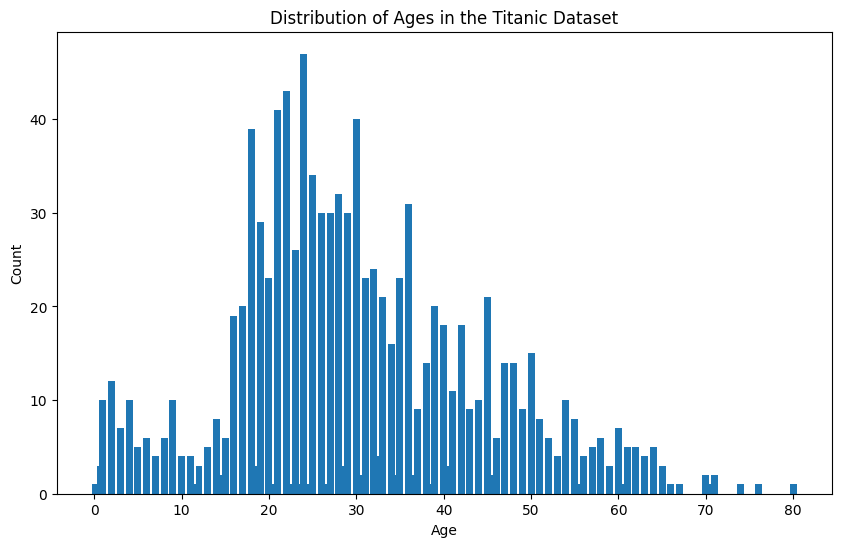

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.title('Distribution of Ages in the Titanic Dataset')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [12]:
# create the above plot using plotly
fig = px.bar(x=x, y=y, labels={'x': 'Age', 'y': 'Count'}, title='Distribution of Ages in the Titanic Dataset')
fig.show()

In [13]:
class_age = combined_pd[['Pclass', 'Age']]
class_age.head(10)

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
5,3,NaN
6,1,54.0
7,3,2.0
8,3,27.0
9,2,14.0


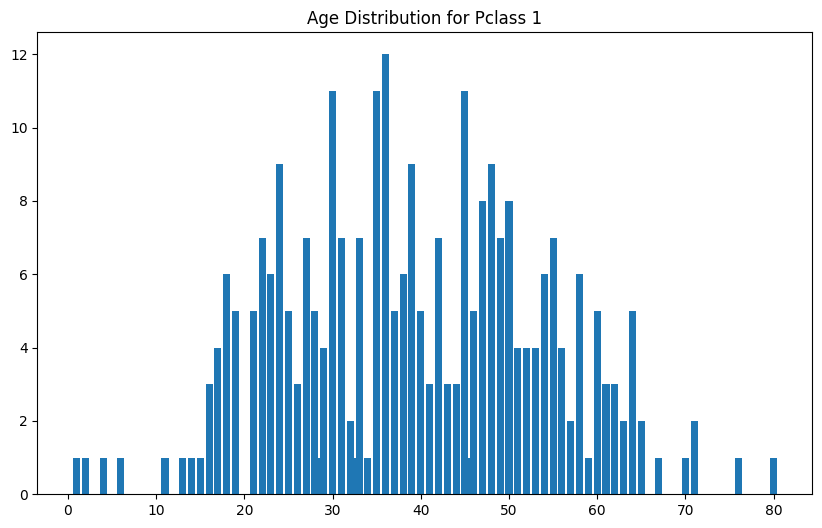

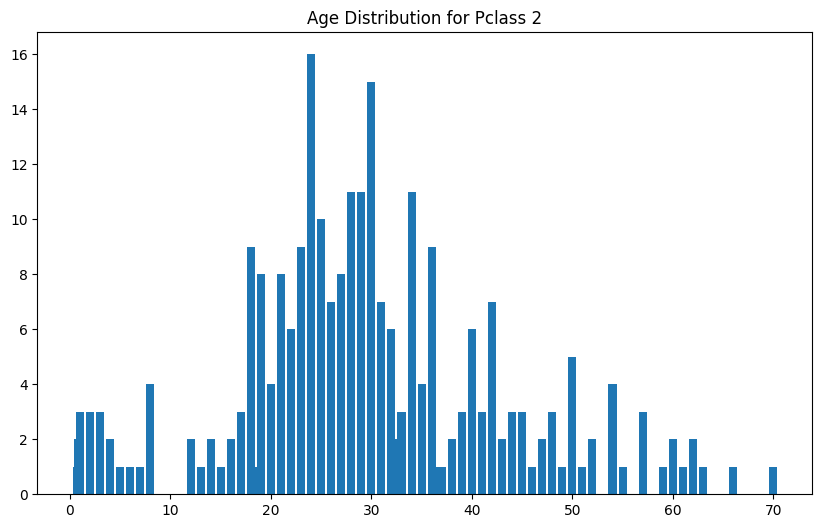

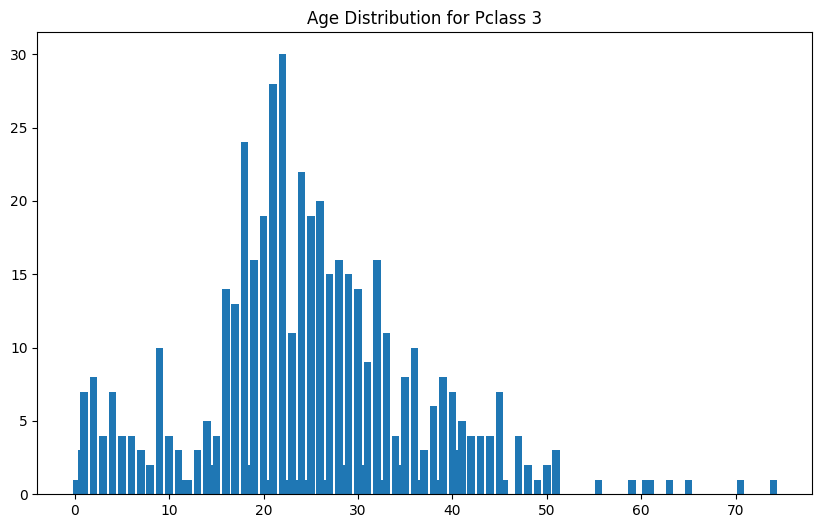

In [14]:
for i in range(1,4):
    plt.figure(figsize=(10, 6))
    plt.title(f'Age Distribution for Pclass {i}')
    y = class_age[class_age['Pclass'] == i]['Age'].value_counts()
    x = y.index.values
    plt.bar(x, y)
    plt.show()

In [15]:
medians = class_age.groupby('Pclass').median()

In [16]:
medians

,Age
Pclass,
1,39.0
2,29.0
3,24.0


In [17]:
for i in range(3):
    idx = np.where( (combined_pd['Pclass'] == i+1) & (combined_pd['Age'].isnull()))[0]
    combined_pd.loc[idx, 'Age'] = medians.values[i][0]
    

In [18]:
print(combined_pd.isnull().sum())

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [19]:
#display the row with null value in the Fare column.
display(combined_pd[combined_pd['Fare'].isnull()])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [20]:
#point to remember, if you embarked from the same location with same
#class you will have the same fare. So we can fill the null value with the median of the fare for that class and embarked location.
sim_fare = combined_pd[(combined_pd['Pclass'] == 3) & (combined_pd['Embarked'] == 'S')]['Fare']
sim_fare.median()

np.float64(8.05)

In [21]:
#replace the null value with the median fare for that class and embarked location.
combined_pd.loc[combined_pd['Fare'].isnull(), 'Fare'] = sim_fare.median()

In [22]:
combined_pd[combined_pd['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [23]:
#again, if fare is same and class of ticket is same then embarked location will also be same. So we can fill the null value with the median of the embarked location for that class and fare.
sim_embarked = combined_pd[(combined_pd['Pclass'] == 1) & (combined_pd['Fare'] > 70) & (combined_pd['Fare'] <= 90)]['Embarked']

In [24]:
print(sim_embarked.value_counts())

Embarked
C    29
S    25
Q     3
Name: count, dtype: int64


In [25]:
# highest occuring value is C so we can fill the null value with C.
combined_pd.loc[combined_pd['Embarked'].isnull(), 'Embarked'] = 'C'

In [26]:
# now we do something for the cabin column.
# we fill it with a value M for missing.
combined_pd['Cabin'] = combined_pd['Cabin'].fillna('M')
#now we take the first letter of the cabin and make it a new column.
combined_pd['Cabin'] = combined_pd['Cabin'].str[0]
#we show the value counts of the cabin column.
print(combined_pd['Cabin'].value_counts())

Cabin
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64


In [27]:
# we add T to the Missing as we don't know what it means.
combined_pd.loc[combined_pd['Cabin'] == 'T', 'Cabin'] = 'M'
print(combined_pd['Cabin'].value_counts())

Cabin
M    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: count, dtype: int64


In [28]:
combined_pd.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S


In [29]:
combined_pd.isnull().sum()  

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Data Feature Engineering

In [30]:
print(combined_pd.nunique())

PassengerId    1309
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin             8
Embarked          3
dtype: int64


In [31]:
#we start with the names column.
combined_pd['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'],
      shape=(1307,), dtype=object)

In [32]:
names = combined_pd['Name']
last_names = []
titles = []
first_names = []

for name in names:
    if ',' not in name:
        last_names.append('')
    else:
        last, name = name.split(',', 1)
        last_names.append(last.strip())
    if '.' not in name:
        titles.append('')
    else:
        title, first = name.split('.', 1)
        titles.append(title.strip())
        first_names.append(first.strip())
last_names = np.array(last_names)
titles = np.array(titles)
first_names = np.array(first_names)


np.unique(titles, return_counts=True)
    

(array(['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major',
        'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir',
        'the Countess'], dtype='<U12'),
 array([  1,   4,   1,   1,   8,   1,   1,   2,  61, 260,   2,   1, 757,
        197,   2,   8,   1,   1]))

In [33]:
#replacing the titles with more common ones. 
idx = np.where(np.isin(titles, ['Capt', 'Col', 'Major']))
titles[idx] = 'Military'

In [34]:
#replacing the titles with more common ones.
idx = np.where(np.isin(titles, ['Don', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Master', 'the Countess']))
titles[idx] = 'Nobility'


In [35]:
# replacing the titles with more common ones.
idx = np.where(np.isin(titles, ['Ms', 'Mlle', 'Miss']))
titles[idx] = 'Ms'

In [36]:
# replacing the titles with more common ones.
idx = np.where(np.isin(titles, ['Mrs', 'Mme']))
titles[idx] = 'Mrs'

In [37]:
np.unique(titles)

array(['Dr', 'Military', 'Mr', 'Mrs', 'Ms', 'Nobility', 'Rev'],
      dtype='<U12')

In [38]:
combined_pd['Title'] = titles
titles

array(['Mr', 'Mrs', 'Ms', ..., 'Mr', 'Mr', 'Nobility'],
      shape=(1309,), dtype='<U12')

In [39]:
combined_pd.nunique()

PassengerId    1309
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin             8
Embarked          3
Title             7
dtype: int64

In [40]:
# titles = combined_pd['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
# titles_list = titles.unique().tolist()
# titles_list

In [41]:
# title_mapping = {
#     'Capt': 'Military',
#     'Col': 'Military',
#     'Major': 'Military',

#     'Don': 'Nobility',
#     'Dona': 'Nobility',
#     'Jonkheer': 'Nobility',
#     'Lady': 'Nobility',
#     'Sir': 'Nobility',
#     'Master': 'Nobility',
#     'the Countess': 'Nobility',

#     'Miss': 'Ms',
#     'Mlle': 'Ms',
#     'Ms': 'Ms',

#     'Mrs': 'Mrs',
#     'Mme': 'Mrs'
# }

# combined_pd['title'] = (
#     combined_pd['Name']
#     .str.split(',').str[1]
#     .str.split('.').str[0]
#     .str.strip()
#     .map(lambda t: title_mapping.get(t, t))  # keep rest as-is
# )


In [42]:
#display(combined_pd)

In [43]:
combined_pd['Title'].isnull().sum()

np.int64(0)

In [44]:
#lets make bin for ages column then rename those bins.
bins = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80])
combined_pd['age_bin'] = pd.cut(combined_pd['Age'], bins)

In [45]:
#we are going to check if there are any tickets with same ticket number.
#because if there are tickets with same number we might want to adjust the fare.
ticket_dict = dict(combined_pd['Ticket'].value_counts())

In [46]:
combined_pd['tkt_count'] = combined_pd['Ticket'].map(ticket_dict)   

In [47]:
combined_pd.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,age_bin,tkt_count
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]",1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]",2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]",1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]",2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]",1


In [48]:
combined_pd['Fare_per_ticket'] = combined_pd['Fare'] / combined_pd['tkt_count']

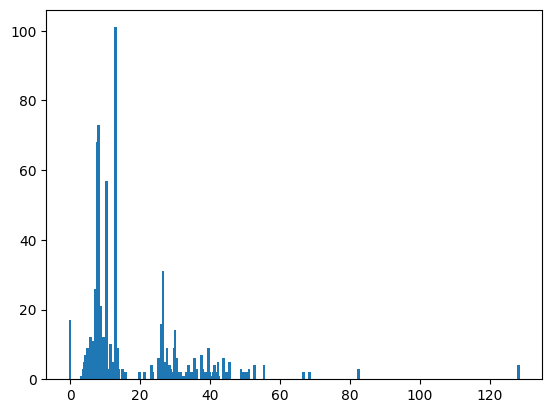

In [49]:
plt.bar(combined_pd['Fare_per_ticket'].value_counts().index.values, combined_pd['Fare_per_ticket'].value_counts())
plt.show()

In [50]:
bins = [0, 20, 40, 60, 80, 150]
combined_pd['Fare_bin'] = pd.cut(combined_pd['Fare_per_ticket'], bins)

In [51]:
combined_pd.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,age_bin,tkt_count,Fare_per_ticket,Fare_bin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]",1,7.25000,"(0, 20]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]",2,35.64165,"(20, 40]"
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]",1,7.92500,"(0, 20]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]",2,26.55000,"(20, 40]"
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]",1,8.05000,"(0, 20]"


In [52]:
combined_pd['num_family'] = combined_pd['SibSp'] + combined_pd['Parch'] + 1

In [53]:
combined_pd.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,age_bin,tkt_count,Fare_per_ticket,Fare_bin,num_family
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]",1,7.25000,"(0, 20]",2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]",2,35.64165,"(20, 40]",2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]",1,7.92500,"(0, 20]",1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]",2,26.55000,"(20, 40]",2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]",1,8.05000,"(0, 20]",1


In [54]:
combined_pd.drop(['Name', 'Age', 'Ticket', 'Fare', 'tkt_count', 'Fare_per_ticket'], axis=1, inplace=True)

In [55]:
combined_pd.head(25)

,PassengerId,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,age_bin,Fare_bin,num_family
0,1,3,male,1,0,M,S,Mr,"(20, 30]","(0, 20]",2
1,2,1,female,1,0,C,C,Mrs,"(30, 40]","(20, 40]",2
2,3,3,female,0,0,M,S,Ms,"(20, 30]","(0, 20]",1
3,4,1,female,1,0,C,S,Mrs,"(30, 40]","(20, 40]",2
4,5,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1
5,6,3,male,0,0,M,Q,Mr,"(20, 30]","(0, 20]",1
6,7,1,male,0,0,E,S,Mr,"(50, 60]","(20, 40]",1
7,8,3,male,3,1,M,S,Nobility,"(0, 10]","(0, 20]",5
8,9,3,female,0,2,M,S,Mrs,"(20, 30]","(0, 20]",3
9,10,2,female,1,0,M,C,Mrs,"(10, 20]","(0, 20]",2


# sklearn

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


In [58]:
combined_pd.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,age_bin,Fare_bin,num_family
0,1,3,male,1,0,M,S,Mr,"(20, 30]","(0, 20]",2
1,2,1,female,1,0,C,C,Mrs,"(30, 40]","(20, 40]",2
2,3,3,female,0,0,M,S,Ms,"(20, 30]","(0, 20]",1
3,4,1,female,1,0,C,S,Mrs,"(30, 40]","(20, 40]",2
4,5,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1


In [59]:
combined_pd.set_index('PassengerId', inplace=True)

In [60]:
label_enc = combined_pd.copy()

In [61]:
label_enc = label_enc.astype(str)

In [62]:
label_enc = label_enc.apply(LabelEncoder().fit_transform)

In [63]:
label_enc.head()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,age_bin,Fare_bin,num_family
PassengerId,,,,,,,,,,
1,2,1,1,0,7,2,2,2,0,2
2,0,0,1,0,2,0,3,3,1,2
3,2,0,0,0,7,2,4,2,0,0
4,0,0,1,0,2,2,3,3,1,2
5,2,1,0,0,7,2,2,3,0,0


In [64]:
one_hot = label_enc.copy()
one_hot = pd.get_dummies(one_hot, columns=['Sex', 'Embarked', 'Title']).astype(int)


In [65]:
one_hot.head()

,Pclass,SibSp,Parch,Cabin,age_bin,Fare_bin,num_family,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6
PassengerId,,,,,,,,,,,,,,,,,,,
1,2,1,0,7,2,0,2,0,1,0,0,1,0,0,1,0,0,0,0
2,0,1,0,2,3,1,2,1,0,1,0,0,0,0,0,1,0,0,0
3,2,0,0,7,2,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,0,1,0,2,3,1,2,1,0,0,0,1,0,0,0,1,0,0,0
5,2,0,0,7,3,0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [66]:
one_hot = label_enc.copy()
one_hot = pd.get_dummies(one_hot, columns = ["Sex", "Embarked","Title"])

In [67]:
one_hot.head()

,Pclass,SibSp,Parch,Cabin,age_bin,Fare_bin,num_family,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6
PassengerId,,,,,,,,,,,,,,,,,,,
1,2,1,0,7,2,0,2,False,True,False,False,True,False,False,True,False,False,False,False
2,0,1,0,2,3,1,2,True,False,True,False,False,False,False,False,True,False,False,False
3,2,0,0,7,2,0,0,True,False,False,False,True,False,False,False,False,True,False,False
4,0,1,0,2,3,1,2,True,False,False,False,True,False,False,False,True,False,False,False
5,2,0,0,7,3,0,0,False,True,False,False,True,False,False,True,False,False,False,False


In [68]:
#Now combine the Survived column back to the one_hot dataframe.
X = one_hot.iloc[train_idx].values
y = survived.values

In [69]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [70]:
# create a bar graph for the scaled data 


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)    

In [72]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(712, 19) (712,) (179, 19) (179,)


In [74]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [76]:
clf.fit(X_train, y_train).score(X_test, y_test)

0.5363128491620112